<a href="https://colab.research.google.com/github/nguyentienkhoa050401/homework_CNN/blob/main/nhan_dien_khuon_mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
import random
import os

In [ ]:
# source_folder = '/content/drive/MyDrive/Colab Notebooks/anh_khoa/train/'
# soure_train = '/content/drive/MyDrive/Colab Notebooks/anh_khoa/training/'
# directory = os.listdir(source_folder)
# print(directory)

In [ ]:
# for item in directory:
#   img = Image.open(source_folder+ item)
#   width,height = img.size
#   imgResize = img.resize((150,150),Image.ANTIALIAS)
#   imgResize.save(soure_train + item[:-4] + '.jpg', quality = 100 )

In [ ]:
# source_folder = '/content/drive/MyDrive/Colab Notebooks/anh_khoa/test/'
# soure_test = '/content/drive/MyDrive/Colab Notebooks/anh_khoa/validation/'
# directory = os.listdir(source_folder)
# print(directory)

In [ ]:
# for item in directory:
#  img = Image.open(source_folder+ item)
#  width,height = img.size 
#  imgResize = img.resize((150,150),Image.ANTIALIAS)
#  imgResize.save(soure_test + item[:-4] + '.png', quality = 100 )

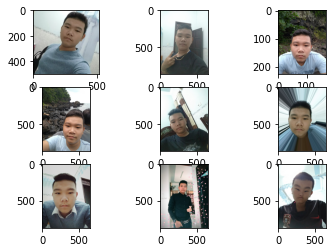

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Colab Notebooks/anh_khoa/train/khoa/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + 'khoa' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [ ]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2
                                )   

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/anh_khoa/train/',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/anh_khoa/test/',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 64 images belonging to 4 classes.
Found 4 images belonging to 4 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 148, 148, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_9 (Batc  (None, 72, 72, 64)      

In [ ]:
history=model.fit(train_dataset,batch_size=400,epochs=40,verbose=1,
                  validation_data=validation_dataset)

Epoch 1/40
7/7 [==============================] - 1s 208ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.5341 - val_accuracy: 0.7500
Epoch 2/40
7/7 [==============================] - 1s 175ms/step - loss: 0.0606 - accuracy: 0.9844 - val_loss: 0.5349 - val_accuracy: 0.7500
Epoch 3/40
7/7 [==============================] - 1s 196ms/step - loss: 0.1151 - accuracy: 0.9688 - val_loss: 0.4889 - val_accuracy: 0.7500
Epoch 4/40
7/7 [==============================] - 1s 156ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0820 - val_accuracy: 1.0000
Epoch 5/40
7/7 [==============================] - 1s 204ms/step - loss: 0.0215 - accuracy: 0.9844 - val_loss: 0.2326 - val_accuracy: 0.7500
Epoch 6/40
7/7 [==============================] - 1s 182ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.3033 - val_accuracy: 0.7500
Epoch 7/40
7/7 [==============================] - 1s 190ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.4072 - val_accuracy: 0.7500
Epoch 8/40
7/7 [====

In [ ]:
model.save('face_40epochs.h5')

In [ ]:
pip install mtcnn

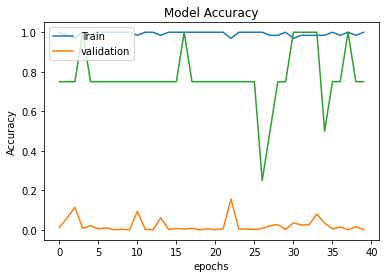

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

Day la Khoa
{'box': [1518, 949, 358, 453], 'confidence': 0.9993663430213928, 'keypoints': {'left_eye': (1661, 1112), 'right_eye': (1816, 1170), 'nose': (1721, 1238), 'mouth_left': (1606, 1285), 'mouth_right': (1750, 1334)}}
{'box': [2203, 1739, 120, 163], 'confidence': 0.99391770362854, 'keypoints': {'left_eye': (2224, 1802), 'right_eye': (2268, 1804), 'nose': (2229, 1842), 'mouth_left': (2224, 1870), 'mouth_right': (2255, 1871)}}
{'box': [2416, 924, 117, 151], 'confidence': 0.9705379605293274, 'keypoints': {'left_eye': (2438, 979), 'right_eye': (2486, 976), 'nose': (2452, 1017), 'mouth_left': (2447, 1046), 'mouth_right': (2481, 1044)}}
{'box': [2346, 969, 125, 163], 'confidence': 0.7334409356117249, 'keypoints': {'left_eye': (2389, 1043), 'right_eye': (2443, 1039), 'nose': (2415, 1080), 'mouth_left': (2396, 1103), 'mouth_right': (2438, 1101)}}


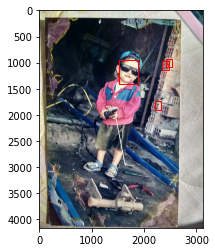

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/anh_khoa/train/khoa/khoa12.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
# plt.show()

img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la Khoa')
elif kq ==1:
  print('Day la Messi')
elif kq ==2:
  print('Day la Neymar')
elif kq ==3:
  print('Day la Ronaldo')
import matplotlib.pyplot as plt
from mtcnn import MTCNN
pixel = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixel)
for face in faces:
  print(face)
data = plt.imread(filename)
plt.imshow(data)
ax = plt.gca()
for face in faces:
  x,y,width,height = face['box']
  rect=plt.Rectangle((x,y),width,height,
                     fill=False, color='red')
  ax.add_patch(rect)
  for key,value in face['keypoints'].items():
    dot = plt.Circle(value,radius=2,color='red')
    ax.add_patch(dot)
plt.show()

Day la Neymar
{'box': [235, 100, 177, 250], 'confidence': 0.9999856948852539, 'keypoints': {'left_eye': (318, 194), 'right_eye': (389, 205), 'nose': (365, 245), 'mouth_left': (309, 280), 'mouth_right': (377, 287)}}


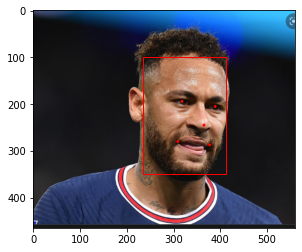

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/anh_khoa/train/neymar/ney17.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
# plt.show()

img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la Khoa')
elif kq ==1:
  print('Day la Messi')
elif kq ==2:
  print('Day la Neymar')
elif kq ==3:
  print('Day la Ronaldo')
import matplotlib.pyplot as plt
from mtcnn import MTCNN
pixel = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixel)
for face in faces:
  print(face)
data = plt.imread(filename)
plt.imshow(data)
ax = plt.gca()
for face in faces:
  x,y,width,height = face['box']
  rect=plt.Rectangle((x,y),width,height,
                     fill=False, color='red')
  ax.add_patch(rect)
  for key,value in face['keypoints'].items():
    dot = plt.Circle(value,radius=2,color='red')
    ax.add_patch(dot)
plt.show()

Day la Ronaldo
{'box': [276, 181, 102, 128], 'confidence': 0.9999574422836304, 'keypoints': {'left_eye': (306, 226), 'right_eye': (352, 227), 'nose': (331, 242), 'mouth_left': (307, 271), 'mouth_right': (353, 273)}}


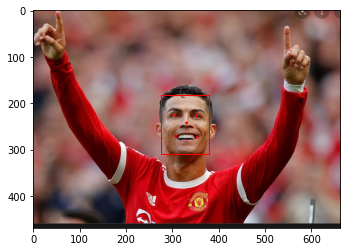

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/anh_khoa/train/ro/ro13.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
# plt.show()

img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la Khoa')
elif kq ==1:
  print('Day la Messi')
elif kq ==2:
  print('Day la Neymar')
elif kq ==3:
  print('Day la Ronaldo')
import matplotlib.pyplot as plt
from mtcnn import MTCNN
pixel = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixel)
for face in faces:
  print(face)
data = plt.imread(filename)
plt.imshow(data)
ax = plt.gca()
for face in faces:
  x,y,width,height = face['box']
  rect=plt.Rectangle((x,y),width,height,
                     fill=False, color='red')
  ax.add_patch(rect)
  for key,value in face['keypoints'].items():
    dot = plt.Circle(value,radius=2,color='red')
    ax.add_patch(dot)
plt.show()